In [1]:
import pandas as pd


In [3]:
data = pd.read_excel("D:\\1KodCalismalari\\Python-Calismalari\\BTK_Veri_Bilimi_Tensorflow\\Tensorflow\\bisiklet_fiyatlari.xlsx")

In [4]:
df = pd.DataFrame(data)
df.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

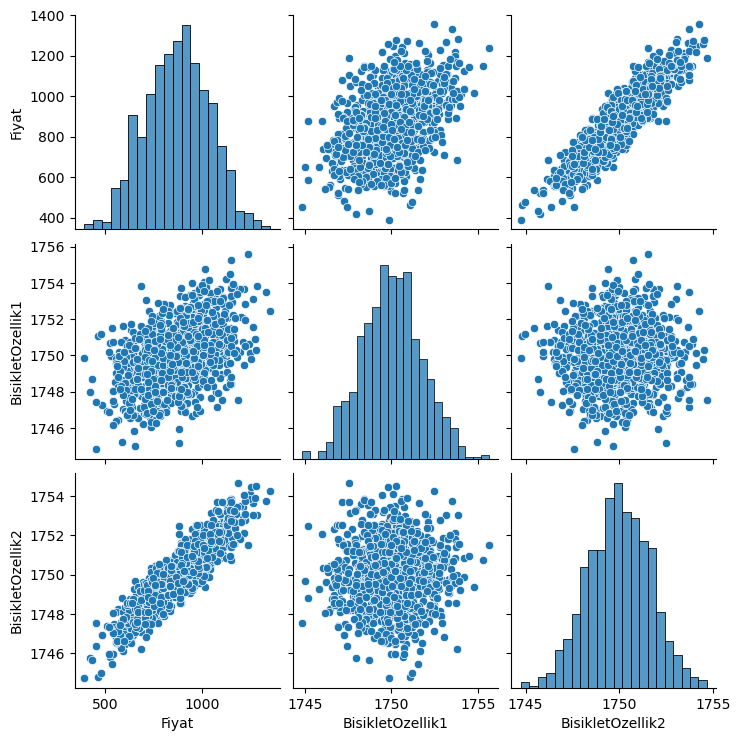

In [6]:
sns.pairplot(df)

## Veriyi Test ve Train olarak ayirmak

In [7]:
from sklearn.model_selection import train_test_split

In [10]:
# y =wx +b
# y hedefimizi yani label
y = df["Fiyat"].values # numpy dizsi olarak y degerimizi belirledik.

# x feature yani ozelliklerimiz
x = df[["BisikletOzellik1", "BisikletOzellik2"]].values

# x ve y degerlerimizi train ve test olarak ayirdik.
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=15)

In [11]:
x_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [ ]:
x_train.shape # 670 tane veri

(670, 2)

In [ ]:
x_test.shape # 330 tane veri

(330, 2)

### SCALING OLCEKLEME

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
scaler.fit(x_train) # scaler.fit ile x_train verilerimizi olceklendiriyoruz. bu scaler nesnesi x_train verilerinin min ve max degerlerini buluyor.
x_train = scaler.transform(x_train) # scaler.transform ile x_train verilerimizi olceklendiriyoruz.

In [17]:
x_test = scaler.transform(x_test) # x_test verilerimizi de olceklendiriyoruz. bu sayede x_test verilerinin min ve max degerleri x_train verilerinin min ve max degerlerine gore olceklendiriliyor.

In [ ]:
x_train # x_train verilerimiz olceklendirilmis hali

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

## Tensorflow

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [21]:
# Modelimizi olusturuyoruz.
model = Sequential()
# Modelimize katman ekliyoruz.
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu')) # 32 tane nöron var.    
model.add(Dense(4, activation='relu')) # 16 tane nöron var.
model.add(Dense(1) ) # 1 tane nöron var. linear aktivasyon fonksiyonu kullanildi. cunku hedefimiz sürekli bir deger.

# Modelimizi derliyoruz.
model.compile(optimizer='rmsprop', loss='mean_squared_error') # Adam optimizeri kullanildi ve mean squared error kayip fonksiyonu kullanildi. 

In [22]:
# Modelimizi egitiyoruz.
model.fit(x_train, y_train, epochs=250)  


Epoch 1/250
21/21 [==============================] - 1s 1ms/step - loss: 795814.3125
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 795634.6250
Epoch 3/250
21/21 [==============================] - 0s 826us/step - loss: 795436.8750
Epoch 4/250
21/21 [==============================] - 0s 957us/step - loss: 795190.0000
Epoch 5/250
21/21 [==============================] - 0s 897us/step - loss: 794882.5625
Epoch 6/250
21/21 [==============================] - 0s 894us/step - loss: 794506.0000
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 794061.1875
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 793537.9375
Epoch 9/250
21/21 [==============================] - 0s 937us/step - loss: 792939.5625
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 792262.5625
Epoch 11/250
21/21 [==============================] - 0s 966us/step - loss: 791502.2500
Epoch 12/250
21/21 [==============================]

<Axes: >

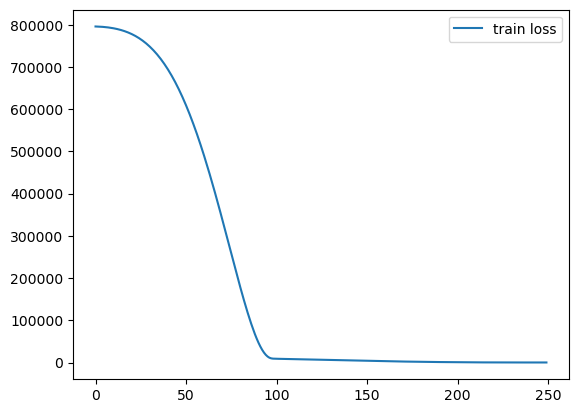

In [26]:
loss = model.history.history["loss"]  # modelin egitim kayip degerlerini aliyoruz.
sns.lineplot(x=range(len(loss)), y=loss, label='train loss')

Bu ifade şu işe yarar:

model → Keras ile eğitilmiş bir model nesnesidir.

model.history → model.fit(...) çağrıldığında dönen History nesnesidir.

model.history.history → Eğitim süreci boyunca izlenen metriklerin (loss, accuracy, val_loss, vs.) kayıtlı olduğu bir dict (sözlük) yapısıdır.

["loss"] → Bu sözlükte "loss" anahtarına karşılık gelen eğitim kaybı (loss) değerlerinin listesini alır. Yani, her epoch sonunda hesaplanan loss değerlerini içeren bir liste döner.

In [27]:
trainLoss = model.evaluate(x_train, y_train,verbose=0) # x_train ve y_train verilerimizi kullanarak modelimizin kayip degerini hesapliyoruz.

In [28]:
testLoss = model.evaluate(x_test, y_test,verbose=0) # x_test ve y_test verilerimizi kullanarak modelimizin kayip degerini hesapliyoruz.

In [30]:
print("Train Loss:", trainLoss)
print("Test Loss :", testLoss)

Train Loss: 74.90676879882812
Test Loss : 80.3186264038086


## Test

In [31]:
testTahminleri = model.predict(x_test) # x_test verilerimizi kullanarak modelimizin tahminlerini hesapliyoruz.

11/11 [==============================] - 0s 706us/step


In [32]:
testTahminleri

array([[1075.8217 ],
       [ 623.9897 ],
       [ 874.9904 ],
       [ 893.7802 ],
       [ 899.1414 ],
       [ 453.7647 ],
       [ 930.0246 ],
       [ 990.1501 ],
       [ 939.34235],
       [1015.17365],
       [ 750.41864],
       [ 916.19604],
       [ 946.68524],
       [1052.7249 ],
       [1118.7006 ],
       [ 681.77386],
       [1125.3384 ],
       [ 651.868  ],
       [1152.9282 ],
       [ 885.4035 ],
       [ 891.8041 ],
       [ 716.10895],
       [ 457.3704 ],
       [ 613.10834],
       [ 833.94025],
       [1088.8938 ],
       [ 713.8309 ],
       [ 756.75555],
       [ 872.9171 ],
       [ 770.379  ],
       [ 452.7998 ],
       [ 782.26953],
       [ 728.16235],
       [ 647.3467 ],
       [ 885.8879 ],
       [ 843.12714],
       [1033.8528 ],
       [1021.5914 ],
       [ 843.94293],
       [ 861.58057],
       [ 756.7025 ],
       [1172.5302 ],
       [1095.558  ],
       [1085.7124 ],
       [ 871.57074],
       [ 597.0293 ],
       [1144.2285 ],
       [ 972.

In [33]:
tahminDf = pd.DataFrame(y_test, columns=["Gercek Y"])

In [39]:
testTahminleri = pd.Series(testTahminleri) # tahminleri tek boyutlu hale getiriyoruz.
testTahminleri

0      1075.821655
1       623.989685
2       874.990417
3       893.780212
4       899.141418
          ...     
325    1011.758362
326     790.720154
327     765.296387
328    1164.972412
329     802.833862
Length: 330, dtype: float32

In [52]:
tahminDf = pd.concat([tahminDf, testTahminleri], axis=1) # tahminDf ile testTahminleri'ni birlestiriyoruz.
tahminDf

,Gercek Y,0
0,1081.652164,1075.821655
1,622.675990,623.989685
2,889.356810,874.990417
3,902.826733,893.780212
4,897.662404,899.141418
...,...,...
325,1028.438035,1011.758362
326,789.934950,790.720154
327,758.490486,765.296387
328,1172.871659,1164.972412


In [54]:
tahminDf.columns = ["Gercek Y", "Tahmin Y"] # tahminDf kolon isimlerini degistiriyoruz.
tahminDf

,Gercek Y,Tahmin Y
0,1081.652164,1075.821655
1,622.675990,623.989685
2,889.356810,874.990417
3,902.826733,893.780212
4,897.662404,899.141418
...,...,...
325,1028.438035,1011.758362
326,789.934950,790.720154
327,758.490486,765.296387
328,1172.871659,1164.972412


<Axes: xlabel='Gercek Y', ylabel='Tahmin Y'>

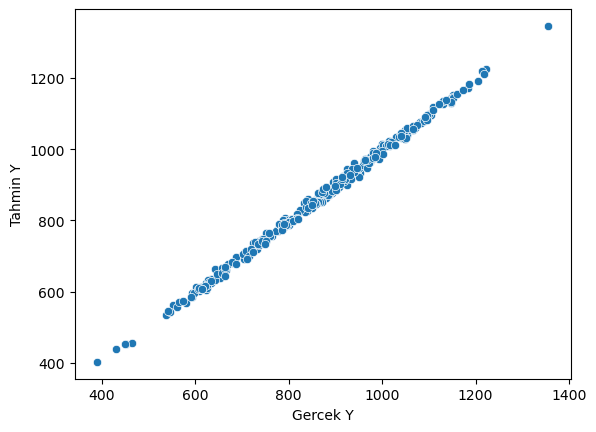

In [55]:
sns.scatterplot(x="Gercek Y", y="Tahmin Y", data=tahminDf) # Gercek Y ve Tahmin Y degerlerini karsilastiriyoruz.

### hata orani bulma

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error # mean absolute error ve mean squared error degerlerini hesaplamak icin kullanilir.
# mean absolute error, tahminlerin gercek degerlerden ne kadar uzak oldugunu gosterir.
# mean squared error, tahminlerin gercek degerlerden ne kadar uzak oldugunu gosterir. ancak bu degerler kare alindigi icin daha buyuk degerler verir.

In [57]:
mean_absolute_error(tahminDf["Gercek Y"],tahminDf["Tahmin Y"]) # mean absolute error degerini hesapliyoruz.

7.1924025439098

In [58]:
df.describe() # df verilerinin istatistiksel degerlerini gosterir.

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


## elde olmayan veri ile model tahmin denemesi

In [59]:
yeniBisikletOzellik1 = [[1760,1758]]

In [60]:
yeniBisikletOzellik1 = scaler.transform(yeniBisikletOzellik1) # yeniBisikletOzellik1 verilerini olceklendiriyoruz.
yeniBisikletOzellik1

array([[1.4133144 , 1.34470668]])

In [61]:
model.predict(yeniBisikletOzellik1) # yeniBisikletOzellik1 verilerini kullanarak modelimizin tahminini hesapliyoruz.

1/1 [==============================] - 0s 18ms/step


array([[1975.7073]], dtype=float32)

## model kaydetme islemi

In [62]:
from tensorflow.keras.models import load_model
model.save("bisiklet_fiyat_modeli.h5") # modelimizi kaydediyoruz

In [63]:
sondaradanCagrilanModel = load_model("bisiklet_fiyat_modeli.h5") # kaydedilen modelimizi yüklüyoruz

In [64]:
sondaradanCagrilanModel.predict(yeniBisikletOzellik1) # sondaradanCagrilanModel ile yeniBisikletOzellik1 verilerini kullanarak modelimizin tahminini hesapliyoruz.

1/1 [==============================] - 0s 49ms/step


array([[1975.7073]], dtype=float32)